In [50]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
banks = [
    'JPM', 
    'BAC', 
    'C', 
    'WFC', 
    'GS'
]

In [52]:
def fetch_stock_data(ticker):
    """Fetch weekly stock data using yfinance (no API key needed)"""
    stock = yf.Ticker(ticker)
    df = stock.history(period="5y", interval="1d")
    
    if df.empty:
        print(f"No data returned for {ticker}")
        return None
    
    return df['Close']

In [53]:
series_dict = {}

for bank in banks:
    series = fetch_stock_data(bank)
    if series is not None:
        series_dict[bank] = series

In [54]:
bank_data = pd.DataFrame(series_dict)
bank_data.shape

(1255, 5)

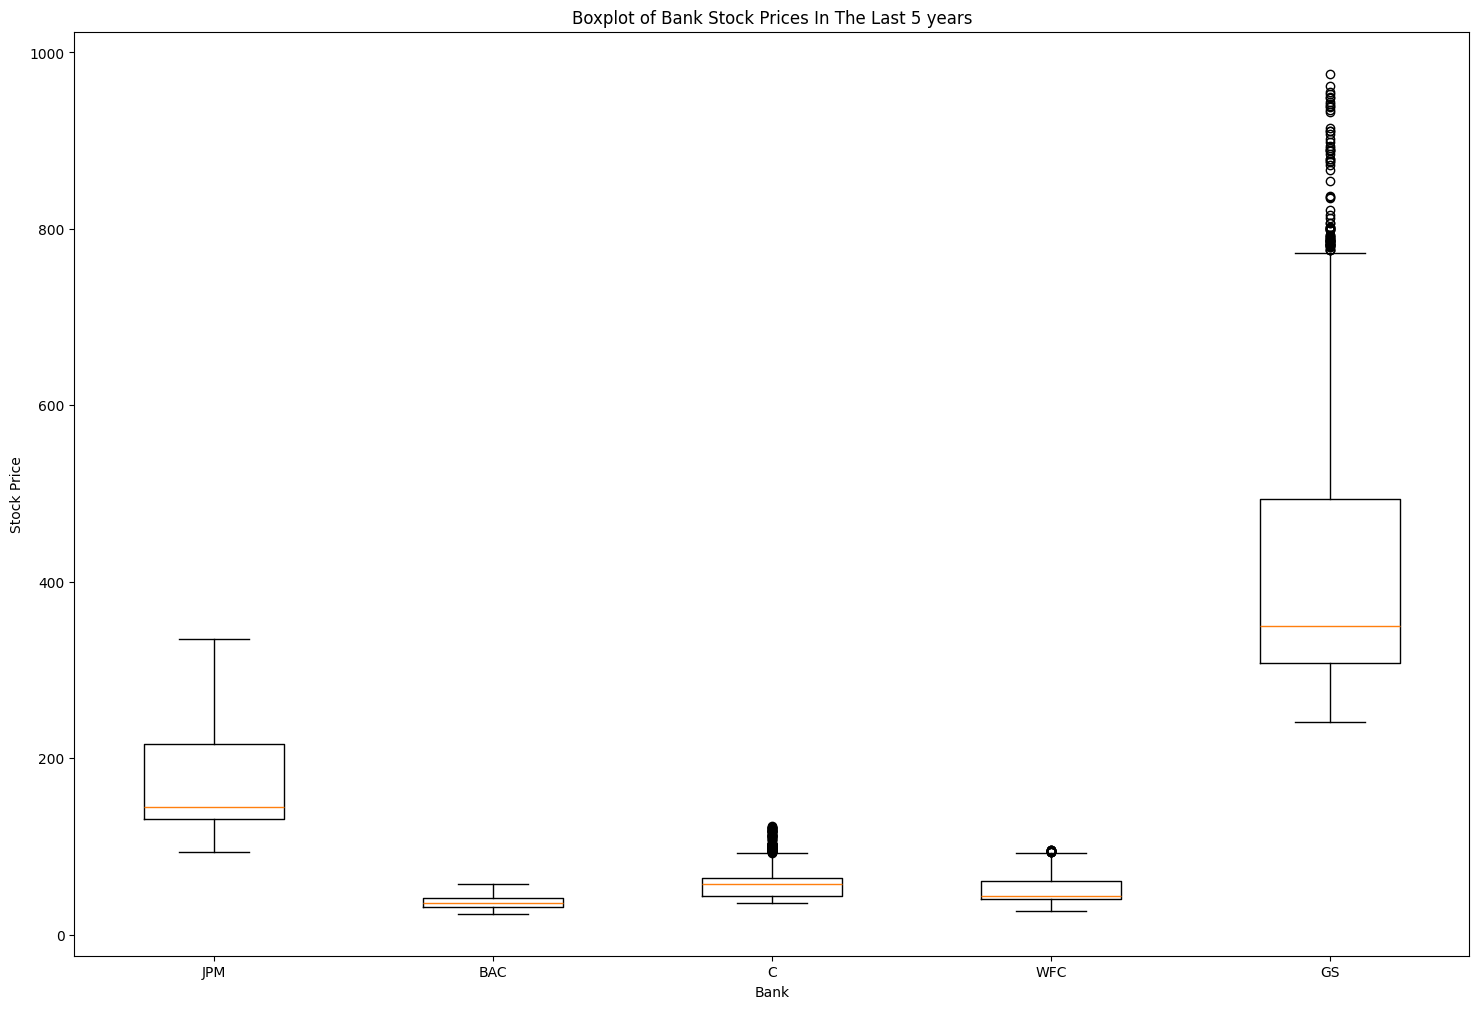

In [90]:
plt.figure(figsize = (18,12))
plt.boxplot(bank_data);
plt.title('Boxplot of Bank Stock Prices In The Last 5 years');
plt.xlabel('Bank');
plt.ylabel('Stock Price');

banks = range(1, len(bank_data.columns)+1)
labels = list(bank_data.columns)
plt.xticks(banks, labels);

Text(0, 0.5, 'Stock Price')

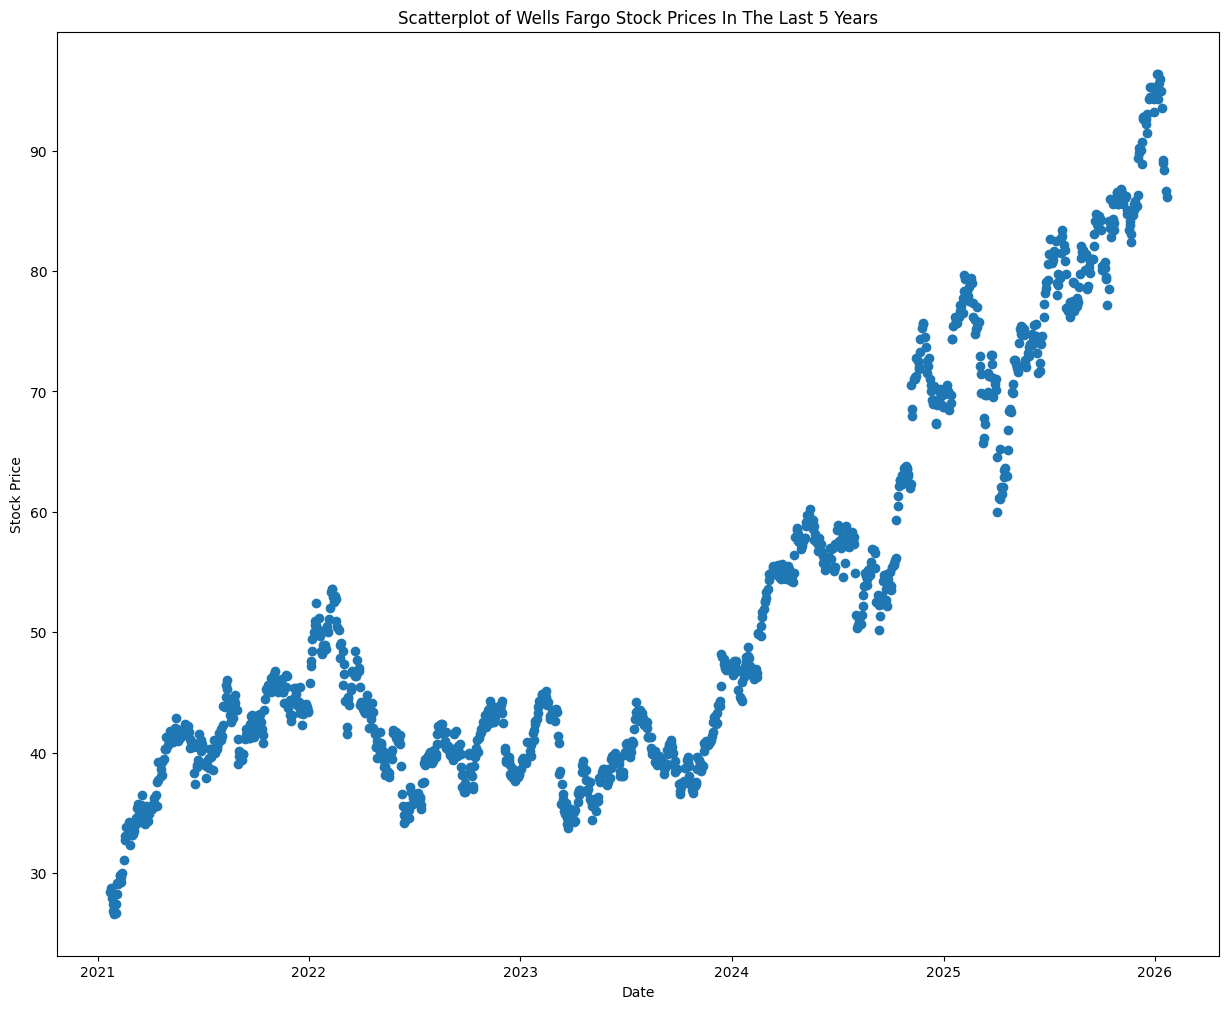

In [91]:
dates = bank_data.index.to_series()

WFC_stock_prices = bank_data['WFC']
plt.figure( figsize=(15,12))
plt.scatter(dates, WFC_stock_prices);
plt.title('Scatterplot of Wells Fargo Stock Prices In The Last 5 Years');
plt.xlabel('Date')
plt.ylabel('Stock Price')